<a href="https://colab.research.google.com/github/ritwiks9635/Data-Science-Project/blob/main/Heart_Attack_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**♥️🩺Heart Attack Prediction🩺♥️**

[❤](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)


- age: Age of the patient
- sex: Sex of the patient
- cp: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic
- trtbps: Resting blood pressure (in mm Hg)
- chol: Cholestoral in mg/dl fetched via BMI sensor
- fbs: (fasting blood sugar > 120 mg/dl), 1 = True, 0 = False
- restecg: Resting electrocardiographic results, 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy
- thalachh: Maximum heart rate achieved
- oldpeak: Previous peak
- slp: Slope
- caa: Number of major vessels
- thall: Thalium Stress Test result ~ (0,3)
- exng: Exercise induced angina ~ 1 = Yes, 0 = No
- output: Target variable

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [8]:
print("DataFrame shape is :: ", df.shape)

DataFrame shape is ::  (303, 14)


In [9]:
df.output.value_counts()

,count
output,
1,165
0,138


In [10]:
df[df.duplicated()]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [11]:
df.drop_duplicates(keep = "first", inplace=True)

In [12]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##**Data Visualization**

**Breakdown of gender**

Number of people having sex as 1 are 96 and Number of people having sex as 0 are 206


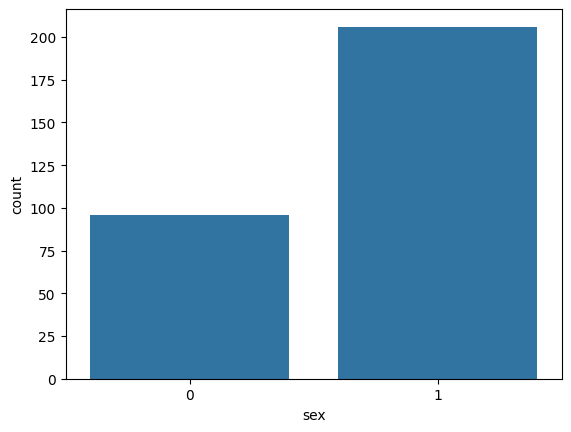

In [13]:
x=(df.sex.value_counts())
print(f'Number of people having sex as 1 are {x[0]} and Number of people having sex as 0 are {x[1]}')
p = sns.countplot(data=df, x="sex")
plt.show()

People having gender as 0 are more than twice the people having gender as 1

**Breakdown for chest pain**

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64


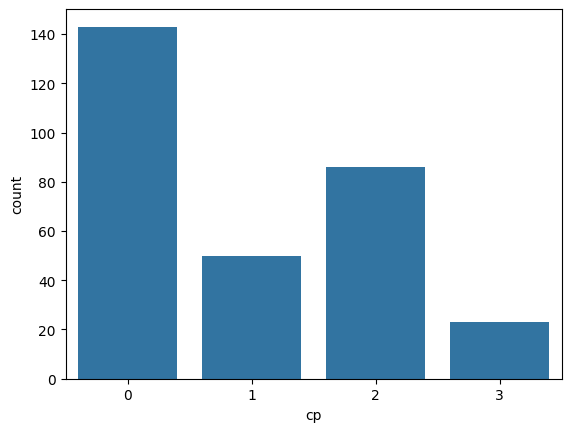

In [14]:
x=(df.cp.value_counts())
print(x)
p = sns.countplot(data=df, x="cp")
plt.show()

1. It can be observed people have chest pain of type 0 i.e 'Typical Angina' is the highest.
2. It can be observed people have chest pain of type 3 i.e 'Asymptomatic' is the lowest
3. It can also be observed people with chest pain of type 0 is almost 50% of all the people.

**Breakdown of FBS**

fbs
0    257
1     45
Name: count, dtype: int64


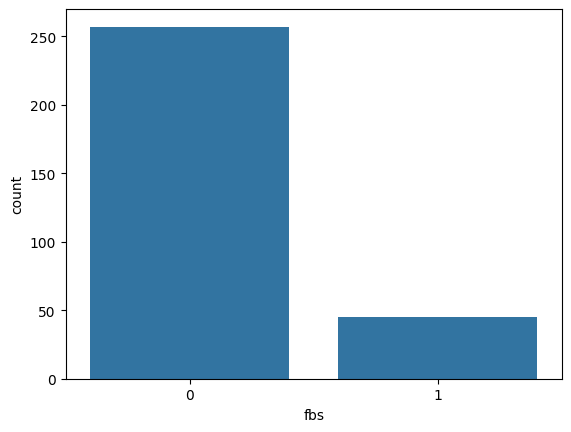

In [15]:
x=(df.fbs.value_counts())
print(x)
p = sns.countplot(data=df, x="fbs")
plt.show()

FBS with value 0 is significantly higher than value 1.

**Breakdown of ECG**

restecg
1    151
0    147
2      4
Name: count, dtype: int64


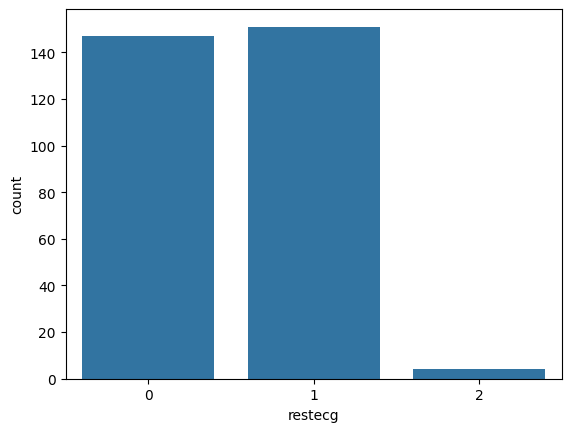

In [16]:
x=(df.restecg.value_counts())
print(x)
p = sns.countplot(data=df, x="restecg")
plt.show()

ECG count is almost the same for type 0 and 1. Also, for type 2 its almost negligible in comparision to type 0 and 1.

**Breakdown for Exercise Induced Angina**

exng
0    203
1     99
Name: count, dtype: int64


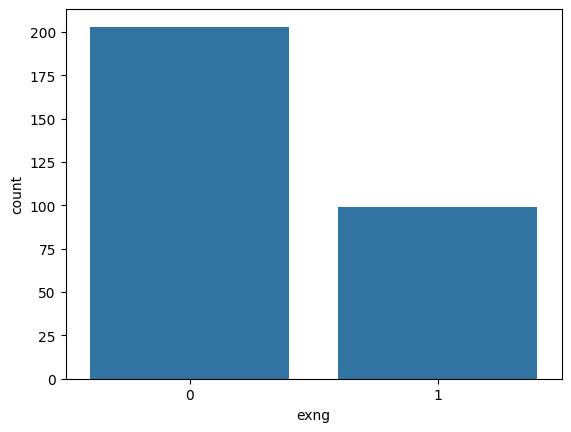

In [17]:
x=(df.exng.value_counts())
print(x)
p = sns.countplot(data=df, x="exng")
plt.show()

EXNG count is more than double for type 0







**Breakdown for Thalium Stress Test**

thall
2    165
3    117
1     18
0      2
Name: count, dtype: int64


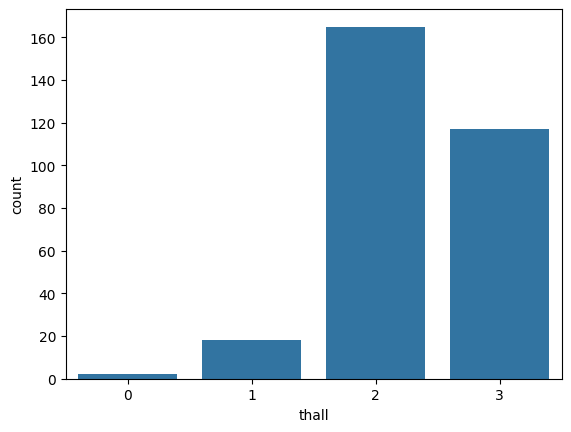

In [18]:
x=(df.thall.value_counts())
print(x)
p = sns.countplot(data=df, x="thall")
plt.show()

Thall count is max for type 2 and min for type 0.

**Density distribution for Age**

<Figure size 1000x1000 with 0 Axes>

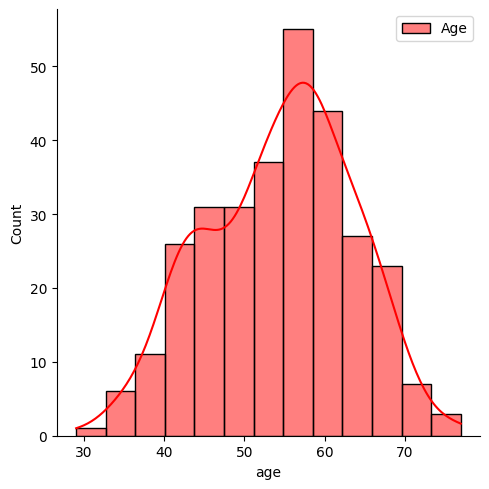

In [19]:
plt.figure(figsize=(10,10))
sns.displot(df.age, color="red", label="Age", kde= True)
plt.legend()

Density distribution is highest for age group 55 to 60

<Figure size 2000x2000 with 0 Axes>

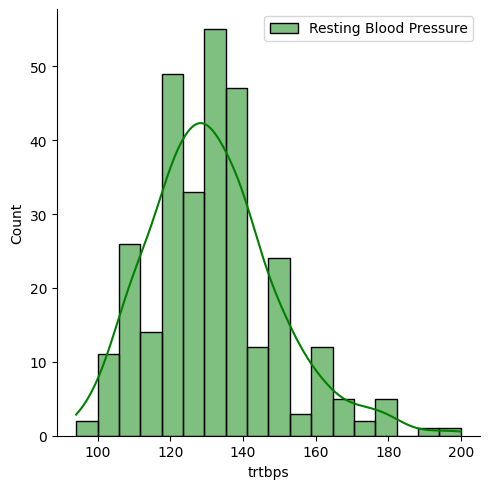

In [20]:
plt.figure(figsize=(20,20))
sns.displot(df.trtbps , color="green", label="Resting Blood Pressure", kde= True)
plt.legend()

Trtbs has the highest count around 130

**Heart Attack Vs Age**

<ipython-input-21-5f01f384a4cc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['output'] == 0]["age"], color='green',kde=True,)
<ipython-input-21-5f01f384a4cc>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['output'] == 1]["age"], color='red',kde=True)


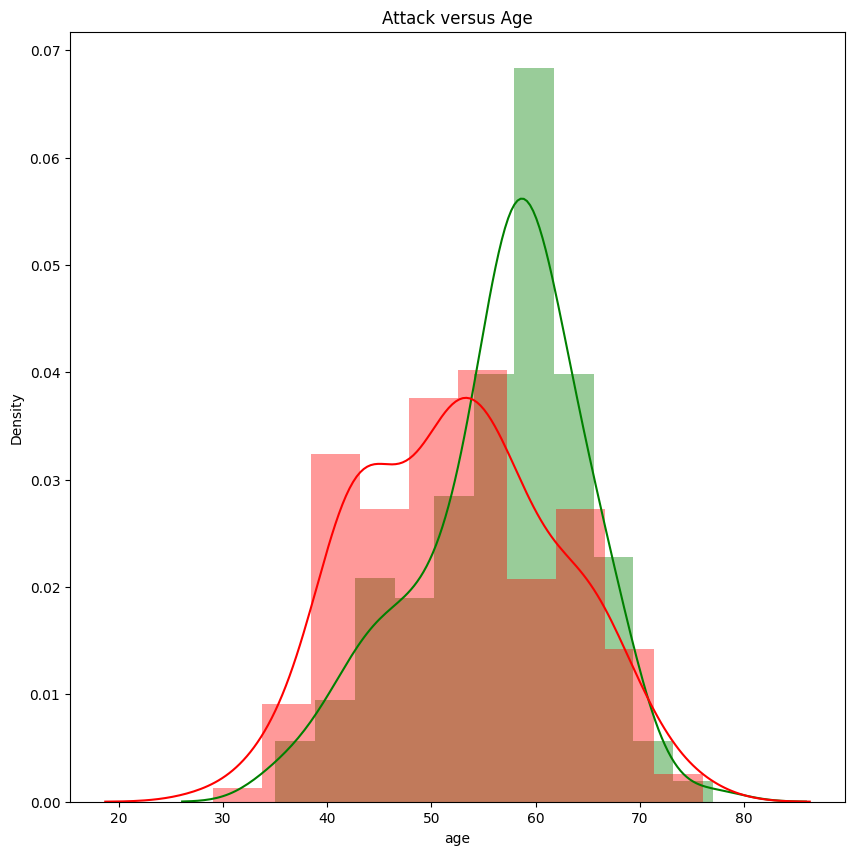

In [21]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["age"], color='green',kde=True,)
sns.distplot(df[df['output'] == 1]["age"], color='red',kde=True)
plt.title('Attack versus Age')
plt.show()

<ipython-input-22-7420559b39e3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['output'] == 0]["chol"], color='green',kde=True,)
<ipython-input-22-7420559b39e3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['output'] == 1]["chol"], color='red',kde=True)


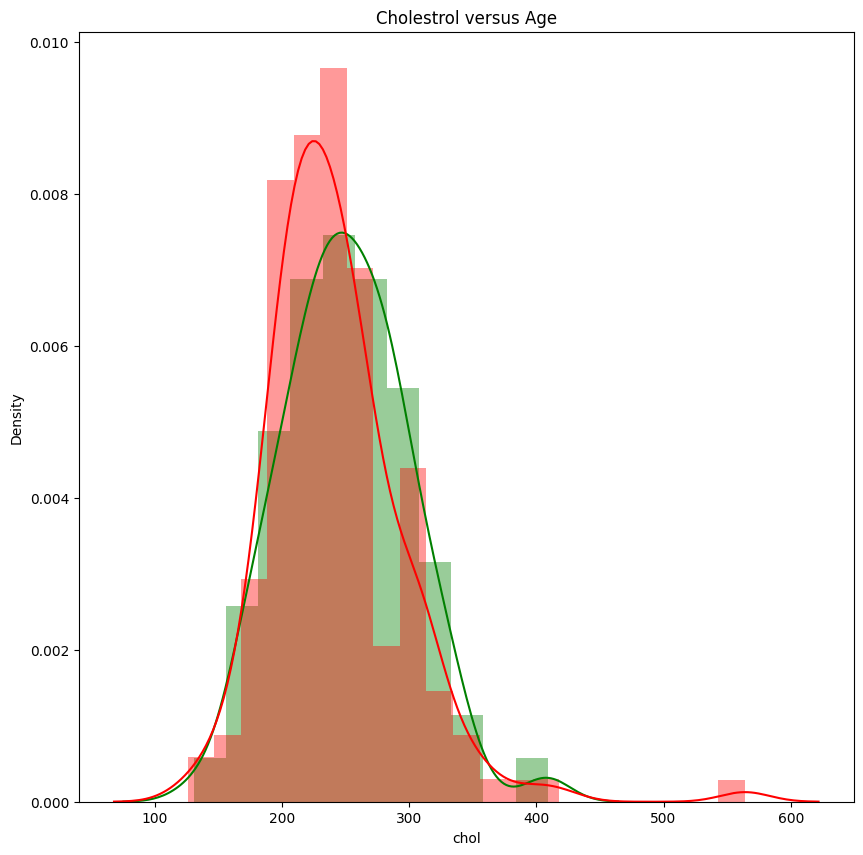

In [22]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["chol"], color='green',kde=True,)
sns.distplot(df[df['output'] == 1]["chol"], color='red',kde=True)
plt.title('Cholestrol versus Age')
plt.show()

<ipython-input-23-a7870398f861>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['output'] == 0]["trtbps"], color='green',kde=True,)
<ipython-input-23-a7870398f861>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['output'] == 1]["trtbps"], color='red',kde=True)


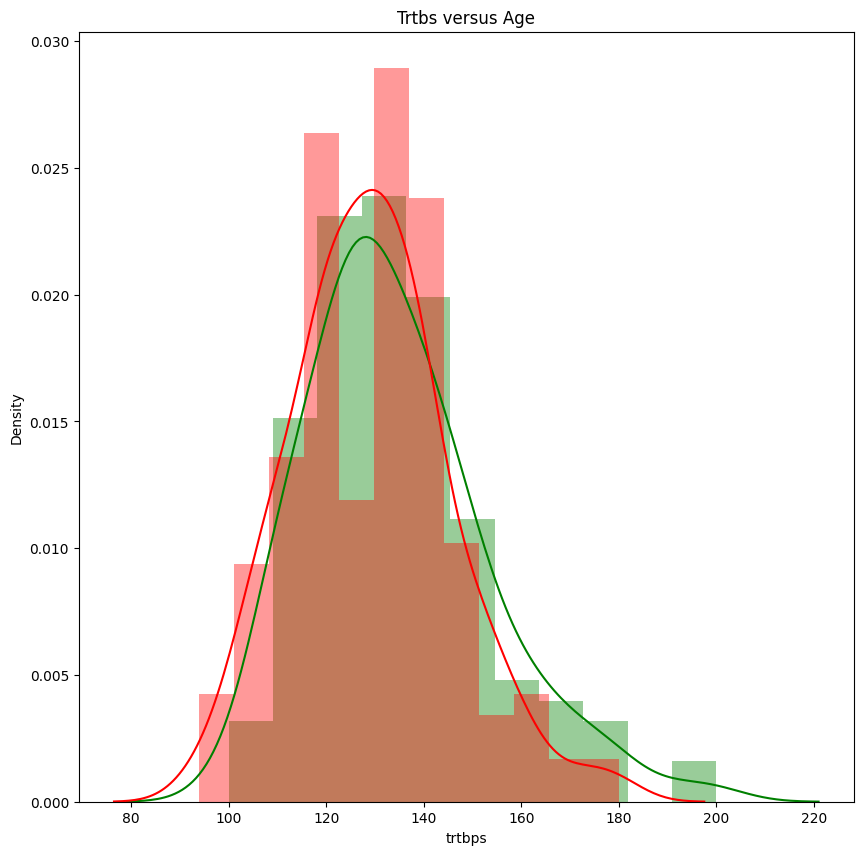

In [23]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["trtbps"], color='green',kde=True,)
sns.distplot(df[df['output'] == 1]["trtbps"], color='red',kde=True)
plt.title('Trtbs versus Age')
plt.show()

<ipython-input-24-3c143d414d9d>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['output'] == 0]["thalachh"], color='green',kde=True,)
<ipython-input-24-3c143d414d9d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['output'] == 1]["thalachh"], color='red',kde=True)


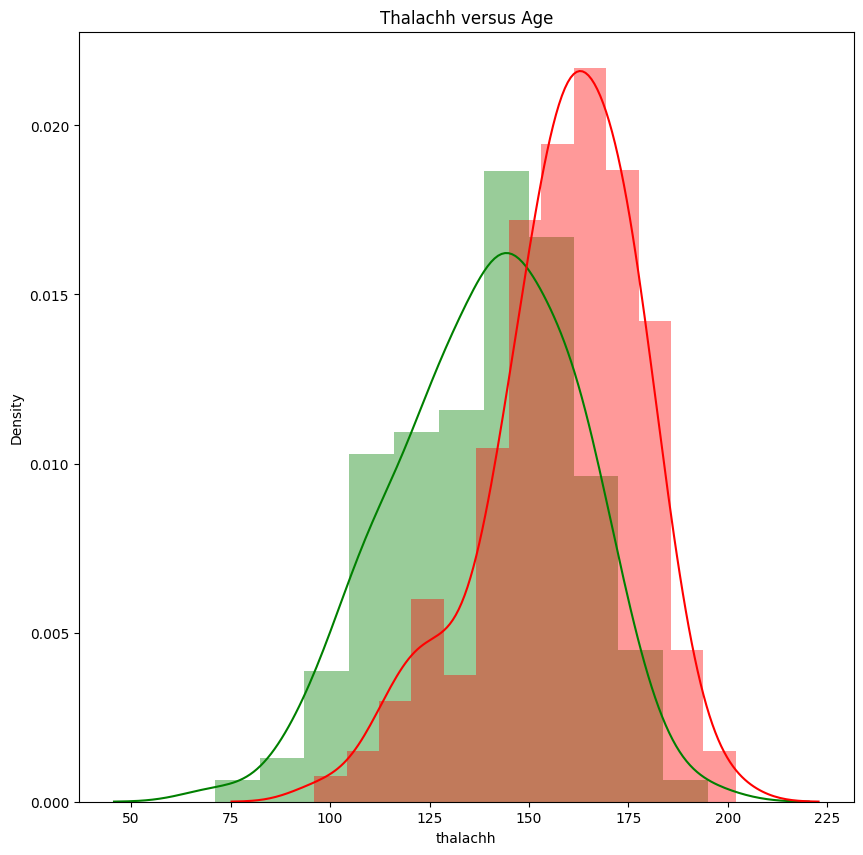

In [24]:
plt.figure(figsize=(10,10))
sns.distplot(df[df['output'] == 0]["thalachh"], color='green',kde=True,)
sns.distplot(df[df['output'] == 1]["thalachh"], color='red',kde=True)
plt.title('Thalachh versus Age')
plt.show()

<Figure size 2000x2000 with 0 Axes>

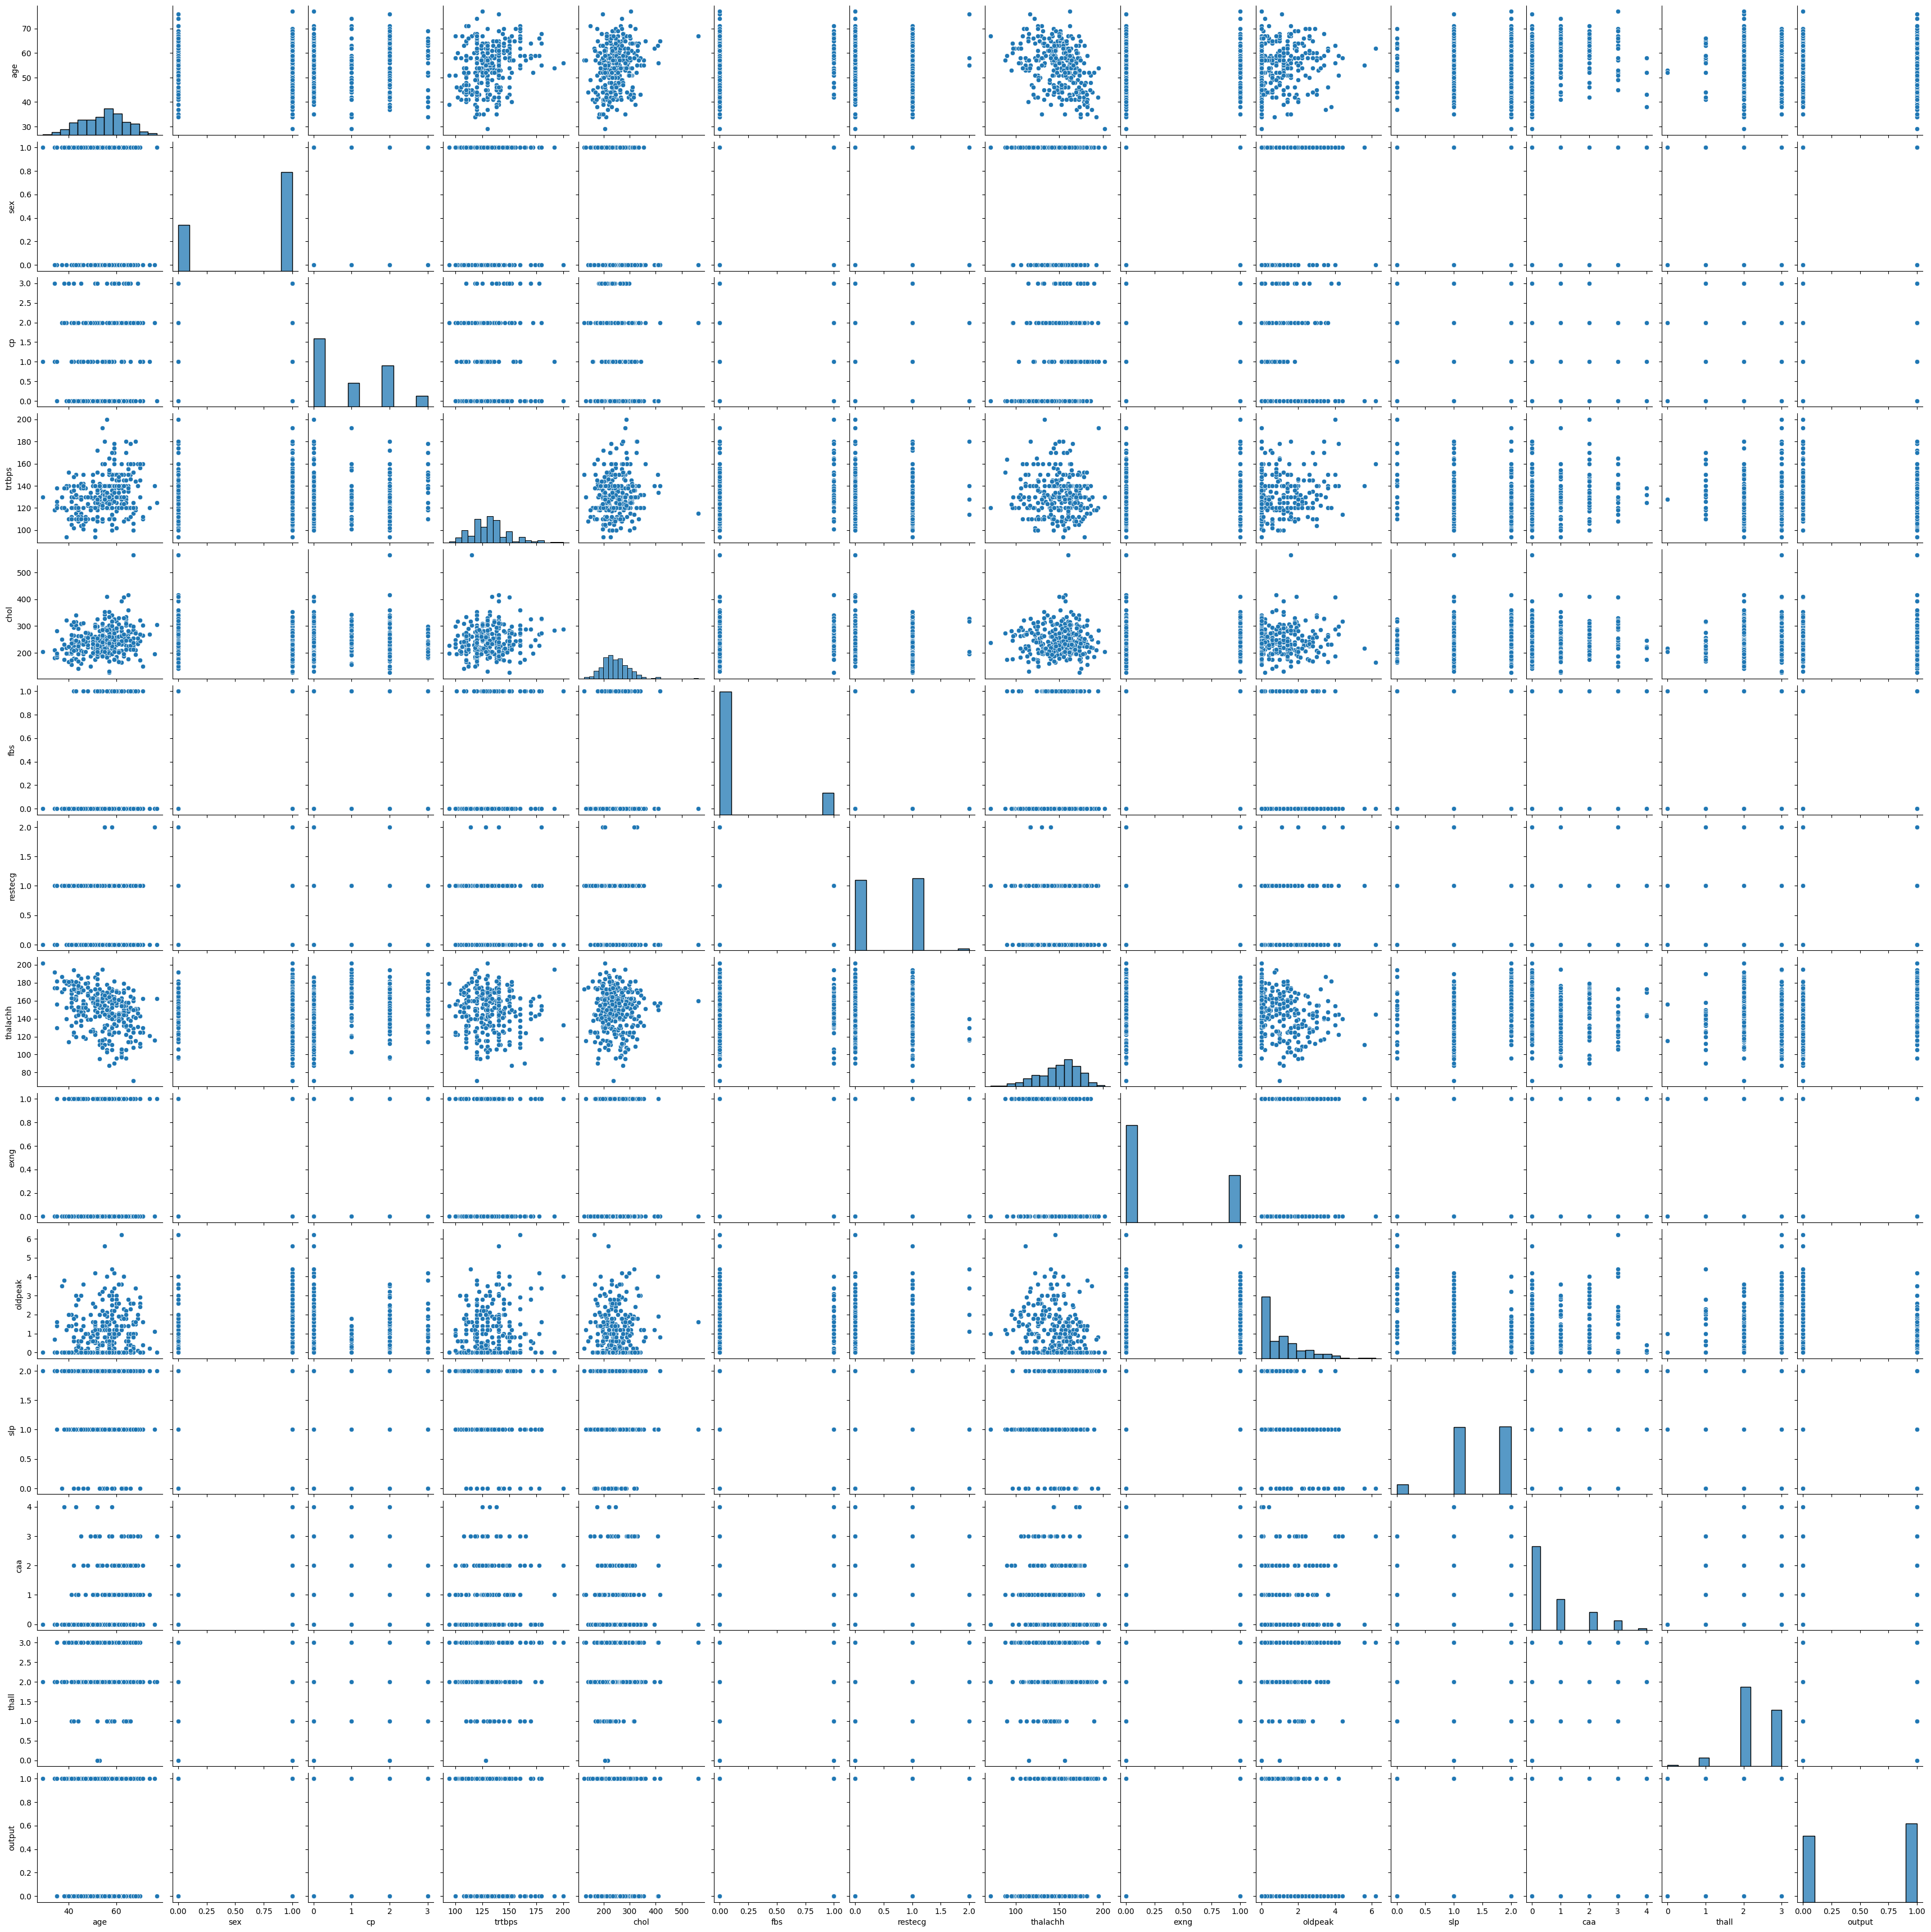

In [25]:
plt.figure(figsize=(20, 20))
sns.pairplot(df)
plt.show()

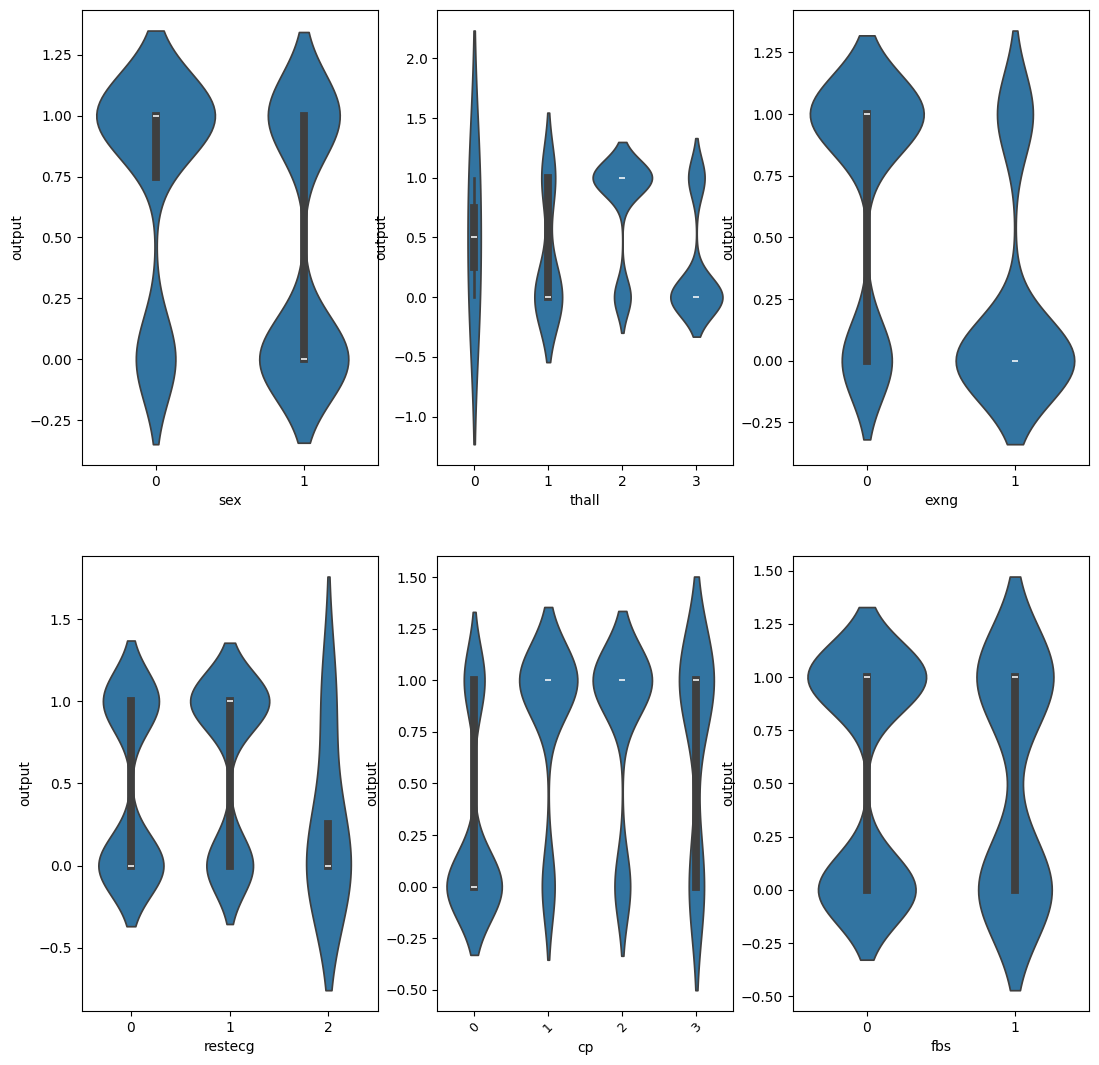

In [26]:
plt.figure(figsize=(13,13))
plt.subplot(2,3,1)
sns.violinplot(x = 'sex', y = 'output', data = df)
plt.subplot(2,3,2)
sns.violinplot(x = 'thall', y = 'output', data = df)
plt.subplot(2,3,3)
sns.violinplot(x = 'exng', y = 'output', data = df)
plt.subplot(2,3,4)
sns.violinplot(x = 'restecg', y = 'output', data = df)
plt.subplot(2,3,5)
sns.violinplot(x = 'cp', y = 'output', data = df)
plt.xticks(fontsize=9, rotation=45)
plt.subplot(2,3,6)
sns.violinplot(x = 'fbs', y = 'output', data = df)

plt.show()

##**Data Preprocessing**

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

print("x_train shape is :: ", x_train.shape)
print("x_test shape is :: ", x_test.shape)
print("y_train shape is :: ", y_train.shape)
print("y_test shape is :: ", y_test.shape)

x_train shape is ::  (241, 12)
x_test shape is ::  (61, 12)
y_train shape is ::  (241,)
y_test shape is ::  (61,)


In [29]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

##**Training Step**

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import xgboost

from sklearn.metrics import confusion_matrix, accuracy_score

In [31]:
model_L = LogisticRegression()
model_L.fit(x_train, y_train)
predicted=model_L.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[25  4]
 [ 6 26]]


The accuracy of Logistic Regression is :  83.60655737704919 %


In [32]:
model_G = GaussianNB()
model_G.fit(x_train, y_train)
predicted=model_G.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of GaussianNB is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[26  3]
 [ 6 26]]


The accuracy of GaussianNB is :  85.24590163934425 %


In [33]:
model_B = BernoulliNB()
model_B.fit(x_train, y_train)
predicted=model_B.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of BernoulliNB is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[25  4]
 [ 4 28]]


The accuracy of BernoulliNB is :  86.88524590163934 %


In [34]:
model_k = KNeighborsClassifier(n_neighbors = 1)
model_k.fit(x_train, y_train)
predicted=model_k.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of KNeighborsClassifier is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[26  3]
 [ 8 24]]


The accuracy of KNeighborsClassifier is :  81.9672131147541 %


Text(0, 0.5, 'Error Rate')

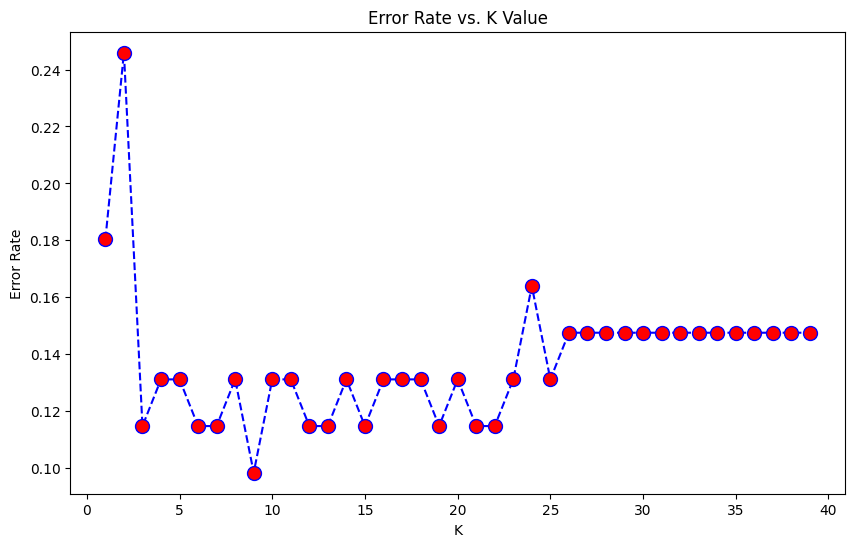

In [35]:
error_rate = []

for i in range(1, 40):

    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    pred_i = model.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize =(10, 6))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
model_k = KNeighborsClassifier(n_neighbors = 9)
model_k.fit(x_train, y_train)
predicted=model_k.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of KNeighborsClassifier is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[27  2]
 [ 4 28]]


The accuracy of KNeighborsClassifier is :  90.1639344262295 %


In [37]:
model_S = SVC()
model_S.fit(x_train, y_train)
predicted=model_S.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of SVC is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[27  2]
 [ 5 27]]


The accuracy of SVC is :  88.52459016393442 %


In [49]:
model_x = xgboost.XGBClassifier(use_label_encoder=False)
model_x.fit(x_train, y_train)
predicted=model_x.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of xgboost is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[25  4]
 [ 6 26]]


The accuracy of xgboost is :  83.60655737704919 %


In [39]:
from sklearn.model_selection import GridSearchCV


# Define hyperparameters for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate on test set
best_rf_preds = grid_search.predict(x_test) # Changed X_test to x_test
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, best_rf_preds))

Best parameters: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Random Forest Accuracy: 0.8688524590163934


In [40]:
model_rf = RandomForestClassifier(max_depth = 10, min_samples_split = 10, n_estimators = 200)
model_rf.fit(x_train, y_train)
predicted=model_rf.predict(x_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of RandomForestClassifier is : ", accuracy_score(y_test, predicted)*100, "%")

Confusion Matrix : 
 [[25  4]
 [ 4 28]]


The accuracy of RandomForestClassifier is :  86.88524590163934 %


##**Prediction Step**

In [48]:
def predict_heart_attack(patient_data):
    """
    Predict the chance of a heart attack based on input data.
    :param patient_data: Dictionary containing patient's details.
    :return: Prediction - 0: Less chance of heart attack, 1: More chance of heart attack.
    """
    patient_df = pd.DataFrame([patient_data])

    processed_data = sc.transform(patient_df)

    prediction = model_k.predict(processed_data)

    if prediction[0] == 0:
        return "Less chance of heart attack (Prediction: 0)"
    else:
        return "More chance of heart attack (Prediction: 1)"


new_patient_data = {
    #'age': 60,
    'sex': 1,
    'cp': 3,
    'trtbps': 145,
    'chol': 233,
    'fbs': 1,
    'restecg': 0,
    'thalachh': 150,
    'exng': 0,
    'oldpeak': 2.3,
    'slp': 0,
    'caa': 0,
    'thall': 1
}

result = predict_heart_attack(new_patient_data)
print(result)

More chance of heart attack (Prediction: 1)


In [50]:
import joblib
joblib.dump(model_k, 'heart_attack_model.pkl')

['heart_attack_model.pkl']

##**Deployment Step**

**Its take json_data**

In [ ]:
from flask import Flask, request, jsonify

# Initialize Flask app
app = Flask(__name__)

# Load the trained model
model_path = 'heart_attack_model.pkl'
model = joblib.load(model_path)

@app.route('/')
def home():
    return "Heart Attack Prediction Model is running!"

@app.route('/predict', methods=['POST'])
def predict():
    # Get JSON request data
    data = request.get_json(force=True)


    patient_df = pd.DataFrame([data])


    processed_data = sc.transform(patient_df)


    prediction = model_k.predict(processed_data)


    output = {
        "prediction": int(prediction[0]),
        "message": "Less chance of heart attack" if prediction[0] == 0 else "More chance of heart attack"
    }

    # Return the prediction in JSON format
    return jsonify(output)

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0', port=5000)